In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'C:\Users\ankit\Tensorflow\cats_and_dogs_small\train'
test_dir = r'C:\Users\ankit\Tensorflow\cats_and_dogs_small\test'
validation_dir = r'C:\Users\ankit\Tensorflow\cats_and_dogs_small\validation'

# Data Preprocessing

* Read the files 
* Decode the JPEG files to RGB grids of pixels 
* Convert these into floating point tensors
* Rescale the pixel values (between 0 and 255) to the [0,1] interval

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
# we have RGB values so we provide 3rd dimension as 3
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers

model.compile(loss= 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [11]:
model_history = model.fit_generator(train_generator, 
                                    steps_per_epoch = 100, #total number of images divided by total batches i.e. 2000/20 = 100
                                    epochs = 20,
                                    validation_data=validation_generator,
                                   validation_steps=50)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 70s 705ms/step - loss: 0.6906 - acc: 0.5340 - val_loss: 0.6847 - val_acc: 0.5520
Epoch 2/20
100/100 [==============================] - 66s 660ms/step - loss: 0.6530 - acc: 0.6005 - val_loss: 0.6550 - val_acc: 0.5980
Epoch 3/20
100/100 [==============================] - 67s 673ms/step - loss: 0.5941 - acc: 0.6845 - val_loss: 0.6818 - val_acc: 0.6010
Epoch 4/20
100/100 [==============================] - 67s 665ms/step - loss: 0.5671 - acc: 0.7015 - val_loss: 0.5916 - val_acc: 0.6730
Epoch 5/20
100/100 [==============================] - 67s 671ms/step - loss: 0.5332 - acc: 0.7265 - val_loss: 0.5992 - val_acc: 0.6660
Epoch 6/20
100/100 [==============================] - 67s 674ms/step - loss: 0.5032 - acc: 0.7670 - val_loss: 0.6360 - val_acc: 0.6650
Epoch 7/20
100/100 [==============================] - 67s 667ms/step - loss: 0.4831 - acc: 0.770

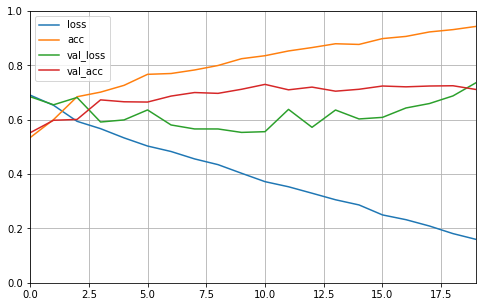

In [12]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
model.save("catsdogs_model.h5")

In [15]:
from tensorflow.keras import backend as k

k.clear_session()
del model

# Shear and Rotation

In [17]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=32,
                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=32,
                class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss= 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [19]:
model_history = model.fit_generator(train_generator, 
                                    steps_per_epoch = 100, #total number of images divided by total batches i.e. 2000/20 = 100
                                    epochs = 100,
                                    validation_data=validation_generator,
                                   validation_steps=50)

Epoch 1/100
100/100 [==============================] - 155s 2s/step - loss: 0.6935 - acc: 0.5192 - val_loss: 0.6800 - val_acc: 0.5603
Epoch 2/100
100/100 [==============================] - 151s 2s/step - loss: 0.6807 - acc: 0.5641 - val_loss: 0.6926 - val_acc: 0.5190
Epoch 3/100
100/100 [==============================] - 147s 1s/step - loss: 0.6676 - acc: 0.5859 - val_loss: 0.6382 - val_acc: 0.6459
Epoch 4/100
100/100 [==============================] - 146s 1s/step - loss: 0.6543 - acc: 0.6080 - val_loss: 0.6179 - val_acc: 0.6440
Epoch 5/100
100/100 [==============================] - 140s 1s/step - loss: 0.6311 - acc: 0.6446 - val_loss: 0.6092 - val_acc: 0.6618
Epoch 6/100
100/100 [==============================] - 151s 2s/step - loss: 0.6198 - acc: 0.6493 - val_loss: 0.6041 - val_acc: 0.6567
Epoch 7/100
100/100 [==============================] - 149s 1s/step - loss: 0.6131 - acc: 0.6658 - val_loss: 0.5794 - val_acc: 0.6878
Epoch 8/100
100/100 [==============================] - 146s 1s

In [20]:
model.save("cnn_project.h5")

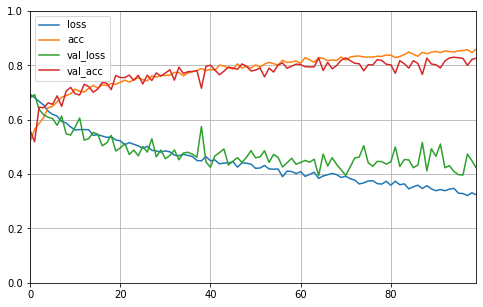

In [21]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape=(150,150,3))


58892288/58889256 [==============================] - 31s 1us/step


In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras import optimizers

model.compile(loss= 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=2e-5),
             metrics = ['acc'])

In [28]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cnn_project-{epoch:02d}.h5")

In [29]:
history = model.fit_generator(train_generator, 
                            steps_per_epoch = 100, #total number of images divided by total batches i.e. 2000/20 = 100
                            epochs = 30,
                            validation_data=validation_generator,
                            validation_steps=50,
                            callbacks=[checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 447s 4s/step - loss: 0.4710 - acc: 0.7630 - val_loss: 0.2051 - val_acc: 0.9260
Epoch 2/30
100/100 [==============================] - 818s 8s/step - loss: 0.2651 - acc: 0.8930 - val_loss: 0.1328 - val_acc: 0.9490
Epoch 3/30
100/100 [==============================] - 864s 9s/step - loss: 0.2141 - acc: 0.9120 - val_loss: 0.1107 - val_acc: 0.9590
Epoch 4/30
100/100 [==============================] - 852s 9s/step - loss: 0.1728 - acc: 0.9300 - val_loss: 0.1066 - val_acc: 0.9580
Epoch 5/30
100/100 [==============================] - 859s 9s/step - loss: 0.1396 - acc: 0.9445 - val_loss: 0.1042 - val_acc: 0.9570
Epoch 6/30
100/100 [==============================] - 870s 9s/step - loss: 0.1387 - acc: 0.9435 - val_loss: 0.1181 - val_acc: 0.9550
Epoch 7/30
100/100 [==============================] - 867s 9s/step - loss: 0.1208 - acc: 0.9460 - val_loss: 0.1000 - val_acc: 0.9640
Epoch 8/30
100/100 [==============================] - 895s 9s/step - 

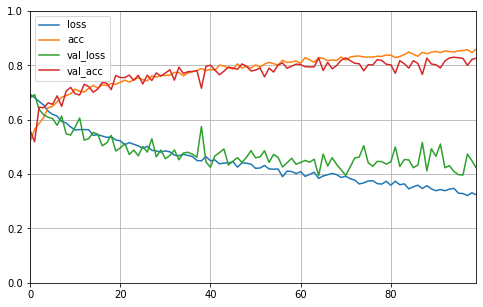

In [30]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
hist_df = pd.DataFrame(history.history)

In [33]:
hist_csv_file = 'history.csv'
with open(hist_csv_file,mode='w') as f:
    hist_df.to_csv(f)

In [34]:
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [35]:
model.evaluate_generator(test_generator, steps=50)

[0.2301420680388128, 0.964]